In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

In [2]:
import dataset
X, Y = dataset.load_data()

In [3]:
pokemon_labels = np.array([
    "Normal",
    "Fire",
    "Water",
    "Electric",
    "Grass",
    "Ice",
    "Fighting",
    "Poison",
    "Ground",
    "Flying",
    "Psychic",
    "Bug",
    "Rock",
    "Ghost",
    "Dragon",
    "Dark",
    "Steel",
    "Fairy"])

In [4]:
y = Y[0]
#Type1しか取ってない
x_train = X[0:700]
y_train = y[0:700]
x_test = X[701:]
y_test = y[701:]
img_list = []
for for_1 in range(18):
    choice_idx = np.random.choice(np.where(y == for_1)[0], 10)
    img_list.append(X[choice_idx])

img_rows, img_cols = 64,64
img_channels = 2

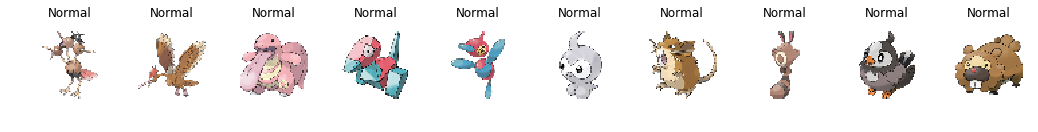

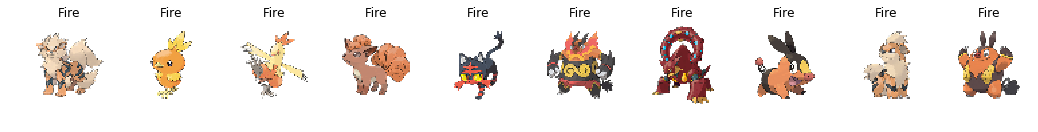

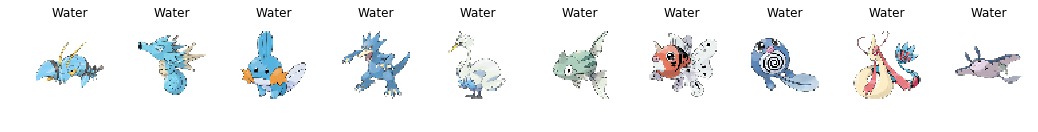

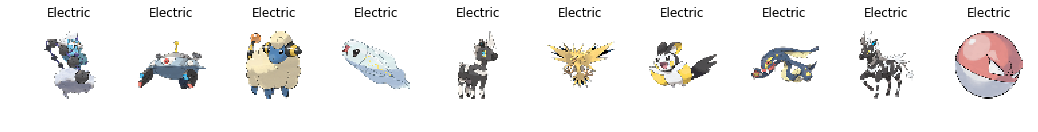

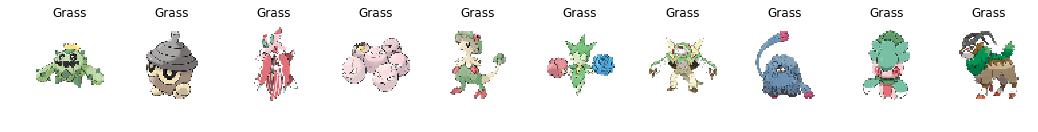

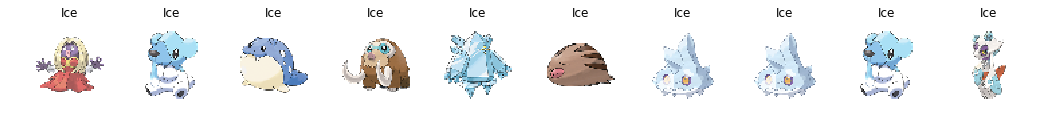

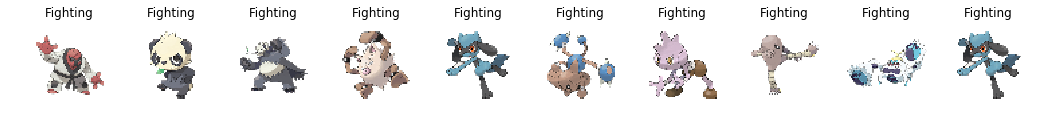

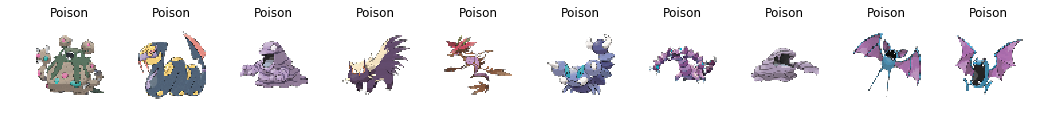

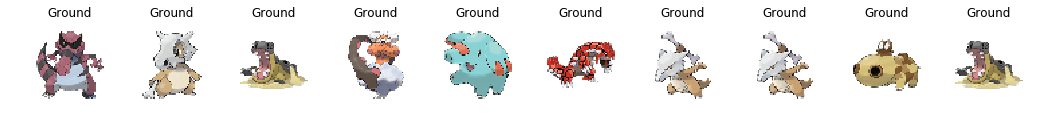

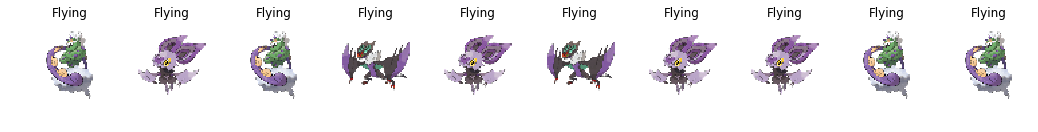

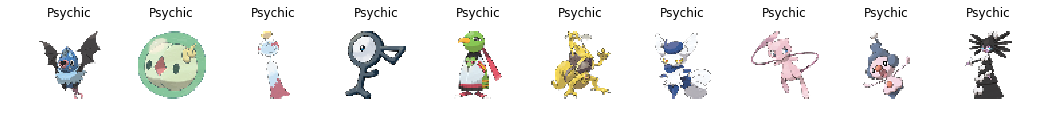

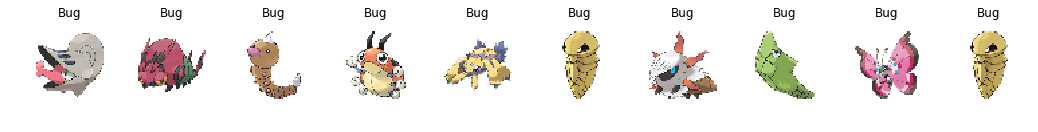

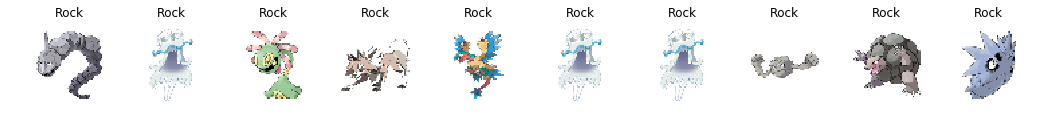

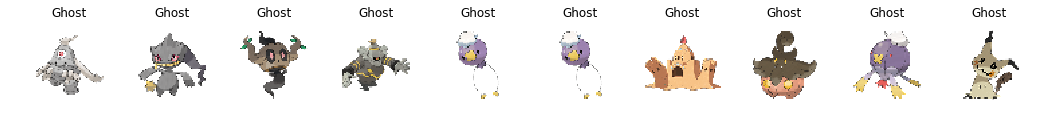

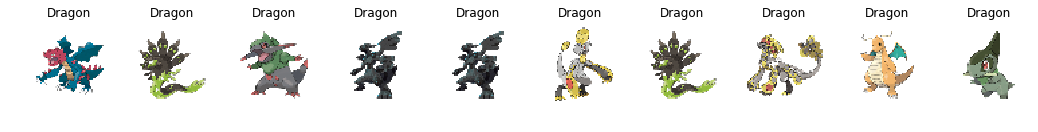

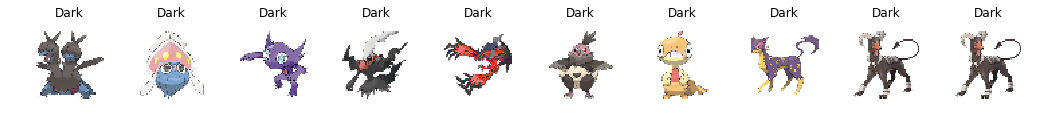

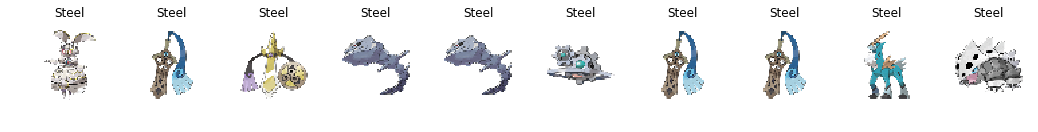

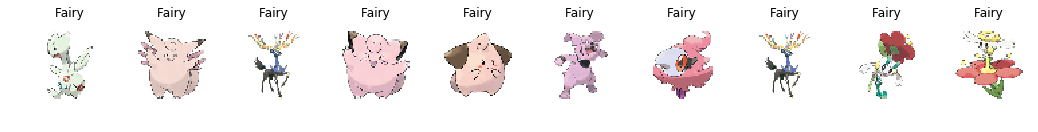

In [5]:
for for_1 in range(18):
    fig, ax = plt.subplots(1, 10, figsize=(18, 8))
    for for_2 in range(10):
        ax[for_2].imshow(img_list[for_1][for_2].reshape(64,64,4)) #for_2の値+nでn番目以降のテストデータを出力する．
        ax[for_2].set_title(pokemon_labels[for_1])
        ax[for_2].axis('off')

In [6]:
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
clf = RandomForestClassifier(verbose=True,
                             n_jobs=-1,
                             random_state=2525)
# x_train=x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
# y_train=y_train.reshape(y_train.shape[0], y_train.shape[1]*y_train.shape[2])
clf.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=2525, verbose=True,
            warm_start=False)

In [7]:
x_train.shape

(700, 16384)

In [8]:
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
print(f"acc: {clf.score(x_test, y_test)}")

acc: 0.12


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


In [9]:
search_params = {
     'n_estimators'      : [5, 10, 20, 30, 50, 100, 300],
      'max_features'      : [3, 5, 10, 15, 20],
      'random_state'      : [2525],
      'n_jobs'            : [1],
      'min_samples_split' : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100],
      'max_depth'         : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100]
}

In [10]:
gs = GridSearchCV(RandomForestClassifier(),           # 対象の機械学習モデル
                  search_params,   # 探索パラメタ辞書
                  cv=3,            # クロスバリデーションの分割数
                  verbose=True,    # ログ表示
                  n_jobs=-1)       # 並列処理
gs.fit(x_train, y_train)
 
print(gs.best_estimator_)

Fitting 3 folds for each of 3500 candidates, totalling 10500 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 362 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 862 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1562 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2462 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3562 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 4862 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 6362 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 8062 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 9962 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=2525, verbose=0,
            warm_start=False)


In [11]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=2525, verbose=0,
            warm_start=False)
clf.fit(x_train, y_train)
print(f"acc: {clf.score(x_test, y_test)}")

acc: 0.16


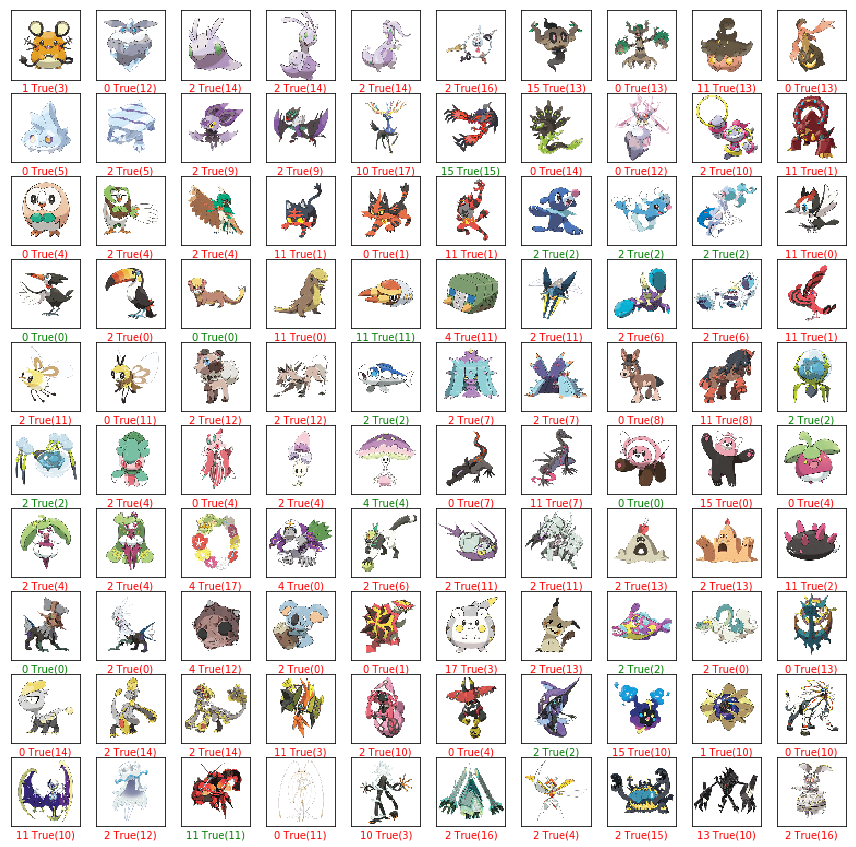

In [12]:
predicted_labels = clf.predict(x_test)

plt.figure(figsize=(15,15))
 
# 先頭から25枚テストデータを可視化
for i in range(100):
 
    # 画像を作成
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].reshape((64,64,4)), cmap=plt.cm.binary)
 
    # 今プロットを作っている画像データの予測ラベルと正解ラベルをセット
    predicted_label = predicted_labels[i]
    true_label      = y_test[i]
 
    # 予測ラベルが正解なら緑、不正解なら赤色を使う
    if predicted_label == true_label:
        color = 'green' # True label color
    else:
        color = 'red'   # False label color
    plt.xlabel("{} True({})".format(predicted_label,
                                  true_label),
                                  color=color)